In [2]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import matplotlib.pyplot as plt
from utils import create_directory, plot_simulations, plot_training_log, window_average
import json
import numpy as np
from model import test
from pathlib import Path
from utils import plot_learning, plot_prelearning

In [19]:
data_dir = create_directory(directory_name='paul')

model_num = 0
model_name = "model{:02d}".format(model_num)
phase: int = 0
ff_coefficient = int(str(0))

weight_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_weights")
log_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_log.json")
cfg_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_cfg.json")

Directory '/Users/plg/Documents/Data/paul' already exists.


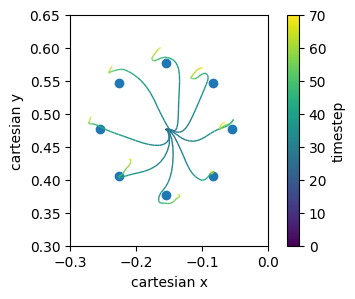

In [20]:
xy, tg = test(cfg_file,weight_file,ff_coefficient=0)
plot_simulations(xy=xy, target_xy=tg)

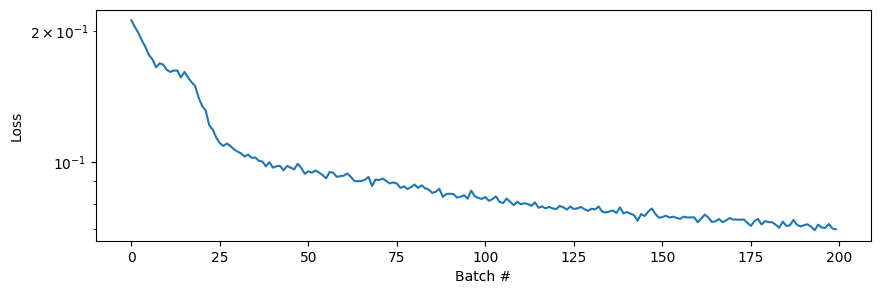

In [14]:
# retrieve and plot training history
with open(log_file,'r') as file:
    loaded_training_log = json.load(file)

loaded_training_log = loaded_training_log['position_loss']
fig = plt.figure(figsize=(10,3))
loaded_training_log = window_average(np.array(loaded_training_log),w=50)
ax = plot_training_log(log=loaded_training_log)

In [15]:
fig, ax = plot_learning(data_dir,num_model=0,w=100,figsize=(6,10),init_phase=0)
ax[0].axhline(y=0.0173, color='k', linestyle='--', linewidth=1)
#fig.savefig(os.path.join(data_dir,'learning_curve.png'),dpi=300)

IndexError: tuple index out of range

In [9]:
data_dir

'/Users/mahdiyarshahbazi/Documents/Data/try0'

(0.04, 0.06)

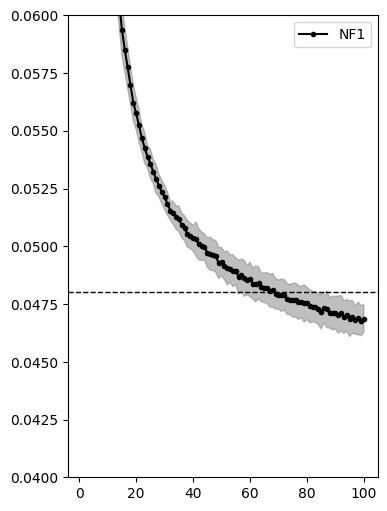

In [6]:
fig, ax = plot_prelearning(data_dir,num_model=16,w=500,figsize=(4,6),phase=0)
ax.axhline(y=0.048, color='k', linestyle='--', linewidth=1)
# set the y limit
ax.set_ylim([0.04,0.06])